In [1]:
# changing cwd
%cd ..

c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp


## Load packages

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np

from scipy.interpolate import griddata
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle

cmap = 'PRGn'

In [3]:
from src.inductive_bias import IB
ib = IB() #instantiate inductive bias package

[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\SimulationData.pickle ] loaded
[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\PosteriorData.pickle ] loaded
[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\TrainedCLF.pickle ] loaded
[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\EstimatedData.pickle ] loaded
[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\HellingerData.pickle ] loaded
[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\SampledData.pickle ] loaded
Size of the S-XOR: (6322,)                    
Size of the Spiral: (6276,)                    
Size of the whole dataset: (12598, 7)

Size of the S-XOR after adding hellinger: (6322, 8)            
Size of the Spiral after adding hellinger: (6276, 8)


## Time and Date of the experiment

In [4]:
print(ib.date)

2021-04-13 06:36:14.452304


## Load MT data

In [5]:
ib.load_MTurk(verbose=True)

Size of the S-XOR: (6322,)                    
Size of the Spiral: (6276,)                    
Size of the whole dataset: (12598, 7)

Size of the S-XOR after adding hellinger: (6322, 8)            
Size of the Spiral after adding hellinger: (6276, 8)


## `human` attribute is structured as follows: $ D_{i=0} = \text{S-XOR}, D_{i=1} = \text{Spiral} $

In [6]:
len(ib.human)

2

## each dataset of `human` attribute is structured as follows: 
$ D_{j=0}: \text{human estimate}\\ D_{j=1}: \text{true posterior}\\ D_{j=2}: \text{dataset type (0: S-XOR, 1: Spiral)}\\ D_{j=3}: \text{x-coordinate}\\ D_{j=4}: \text{euclidean distance from the origin (0,0)}\\ D_{j=5}: \text{y-coordinate}\\ D_{j=6}: \text{hellinger distance between human estimate and true posterior}\\ D_{j=7}: \text{participant ID} $

`['est', 'real', 'mtype', 'x', 'd', 'y', 'hellinger', 'id']`

## Total of 6322 and 6276 sample points were collected from 126 subjects for spiral and S-XOR datasets, respectively
Each subject is presented 100 trials, thus 126 subjects should have produced 12600 total sample points. Here, we are 2 points short due to host server delay

In [7]:
ib.human[0].shape, ib.human[1].shape, ib.human[0].shape[0] + ib.human[1].shape[0]

((6276, 8), (6322, 8), 12598)

## There are 3600 possible grid points and 3497 of those are occupied

In [8]:
a = np.column_stack([ib.human[0][:,3], ib.human[0][:,5]]).astype(float).round(2)
b = ib.generate_mask(rng=3, h=0.1)#.round(2)

a = pd.DataFrame(a).drop_duplicates()
b = pd.DataFrame(b).drop_duplicates()

a.shape[0], b.shape[0]

(3497, 3600)

### Visualizing grid occupancy

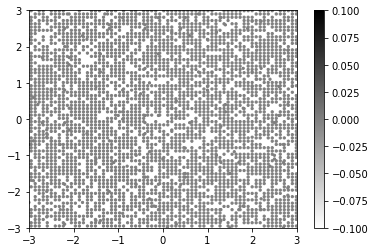

In [9]:
tempxy3 = ib.pointwise_gridAverage(np.column_stack([ib.human[0][:,3], ib.human[0][:,5], ib.human[0][:,0]*0]))
plt.scatter(x=tempxy3['x'], y=tempxy3['y'], c=tempxy3['c']*0, s=5, cmap='binary')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.colorbar()

## Visualizing MT data

In [41]:
MT_mask = ib.generate_mask(h=0.1)

In [42]:
uX = ib.generate_mask(rng=3) #getting a grid
uX0, uX1 = uX[:,0], uX[:,1] #split x and y-coordinates

method = ['nearest', 'linear', 'cubic'] #interpolation method
rng = 3 #max radial range

MT4 = ib.human[0] #spiral
MT2 = ib.human[1] #S-XOR

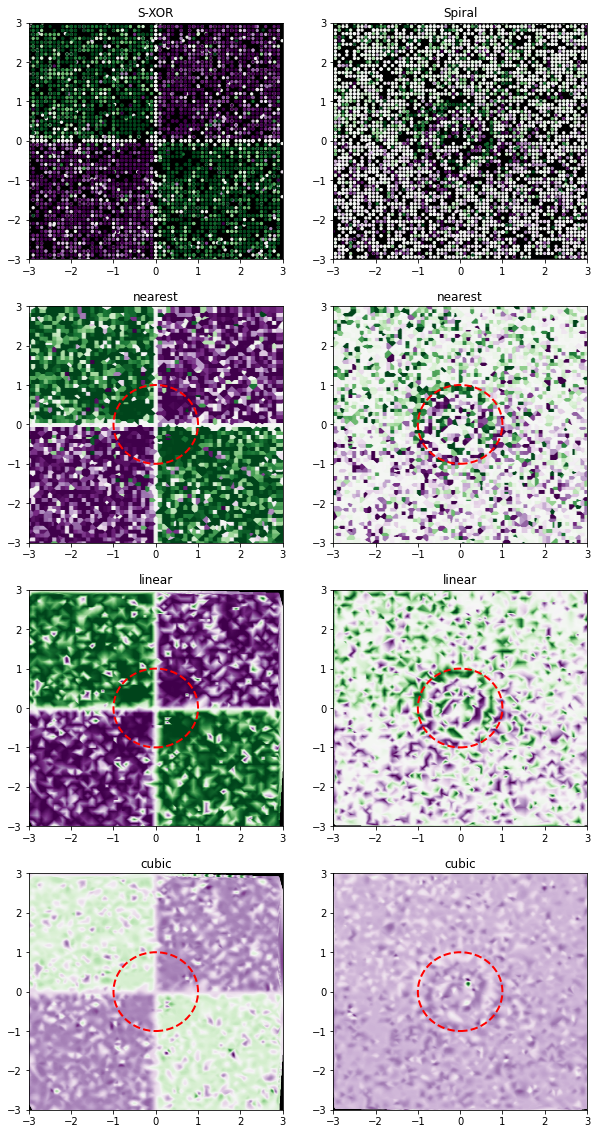

In [8]:
fig, ax = plt.subplots(4,2, figsize=(5*2,5*4))

for f in range(4):
    if f == 0:
        ax[f,0].scatter(MT2[:,3],MT2[:,5], c=MT2[:,0], cmap='PRGn',s=5)
        ax[f,0].set_facecolor('k')
        ax[f,1].scatter(MT4[:,3],MT4[:,5], c=MT4[:,0], cmap='PRGn',s=5)
        ax[f,1].set_facecolor('k')
        ax[f,0].set_title('S-XOR')
        ax[f,1].set_title('Spiral')
    else:
        grid_near = griddata((MT2[:,3], MT2[:,5]), MT2[:,0], (uX0,uX1), method=method[f-1], rescale=False)
        ax[f,0].scatter(uX0,uX1, c=grid_near, cmap='PRGn',s=1)
        ax[f,0].set_facecolor('k')
        ax[f,0].add_patch(Circle((0,0), radius=1, linewidth=2, ls='--',edgecolor='r', fill=False))
        
        grid_near = griddata((MT4[:,3], MT4[:,5]), MT4[:,0], (uX0,uX1), method=method[f-1], rescale=False)
        ax[f,1].scatter(uX0,uX1, c=grid_near, cmap='PRGn',s=1)
        ax[f,1].set_facecolor('k')
        ax[f,1].add_patch(Circle((0,0), radius=1, linewidth=2, ls='--',edgecolor='r', fill=False))

        ax[f,0].set_title(method[f-1])
        ax[f,1].set_title(method[f-1])

    ax[f,0].set_xlim([-rng,rng])
    ax[f,0].set_ylim([-rng,rng])
    ax[f,1].set_xlim([-rng,rng])
    ax[f,1].set_ylim([-rng,rng])

plt.savefig(f'figs/[20210330_read_MTurk]_human_interpolation_{str(ib.date.date())}.png', bbox_inches='tight')

## Linear interpolation exploration

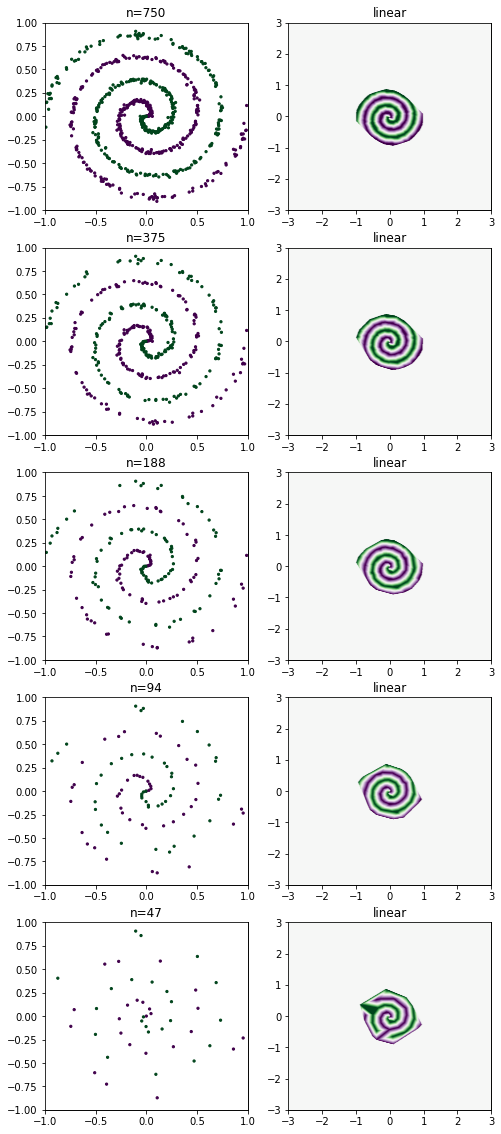

In [43]:
X = ib.generate_spirals(N=750,K=2)
X1, X2 = X[0][:,0], X[0][:,1]
y = X[1]

method_num = 1

cnt = 0
fig, axs = plt.subplots(5,2, figsize=(4*2,4*5))
plt.setp(axs, xticks=[], yticks=[])
for i, n in enumerate([1,2,4,8,16]):    #1,2,4,8,16
    cnt += 1
    axs = fig.add_subplot(5,2,cnt)
    axs.scatter(X1[::n],X2[::n],c=y[::n], s=5, cmap=cmap)
    axs.set_title('n={}'.format(y[::n].size))
    plt.setp(axs, xlim=[-1,1], ylim=[-1,1])

    cnt += 1
    axs = fig.add_subplot(5,2,cnt)
    grid_near = griddata((X1[::n],X2[::n]),y[::n], (uX0,uX1), method=method[method_num], fill_value=0.5, rescale=False)
    axs.scatter(uX0,uX1, c=grid_near, cmap='PRGn',s=1)
    axs.set_title(method[method_num])
    plt.setp(axs, xlim=[-3,3], ylim=[-3,3])

plt.savefig(f'figs/[20210330_read_MTurk]_test_interpolation_{str(ib.date.date())}.png', bbox_inches='tight')

## Looking into rescaling difference while interpolating

Text(0.5, 1.0, 'rescale on')

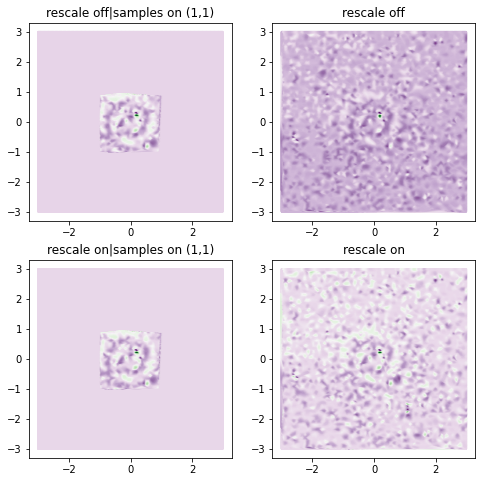

In [10]:
MT = MT2

temp_idx_3 = (MT[:,3] <= 1) * (MT[:,3] >= -1)
temp_idx_5 = (MT[:,5] <= 1) * (MT[:,5] >= -1)
temp_idx = temp_idx_3 * temp_idx_5

fig, axs = plt.subplots(2,2, figsize=(4*2,4*2))
grid_near = griddata((MT[:,3][temp_idx],MT[:,5][temp_idx]),MT[:,0][temp_idx], (uX0,uX1), method=method[2], fill_value=0.5, rescale=False)
axs[0,0].scatter(uX0,uX1, c=grid_near, cmap='PRGn',s=1)
axs[0,0].set_title('rescale off|samples on (1,1)')

grid_near = griddata((MT[:,3][:],MT[:,5][:]),MT[:,0][:], (uX0,uX1), method=method[2], fill_value=0.5, rescale=False)
axs[0,1].scatter(uX0,uX1, c=grid_near, cmap='PRGn',s=1)
axs[0,1].set_title('rescale off')

grid_near = griddata((MT[:,3][temp_idx],MT[:,5][temp_idx]),MT[:,0][temp_idx], (uX0,uX1), method=method[2], fill_value=0.5, rescale=True)
axs[1,0].scatter(uX0,uX1, c=grid_near, cmap='PRGn',s=1)
axs[1,0].set_title('rescale on|samples on (1,1)')

grid_near = griddata((MT[:,3][:],MT[:,5][:]),MT[:,0][:], (uX0,uX1), method=method[2], fill_value=0.5, rescale=True)
axs[1,1].scatter(uX0,uX1, c=grid_near, cmap='PRGn',s=1)
axs[1,1].set_title('rescale on')

# filename = 'figs/' + str(datetime.today())[:10] + '_interpolation_rescale.png'
# plt.savefig(filename, bbox_inches='tight')

## Radial distance plot of class 1 posterior and hellinger Distance for all ML models and human

In [12]:
fsize= 18
label = ib.mtype + ['Human']
titles = ['Class 1 Posterior', 'Hellinger Distance']

## S-XOR radial plots

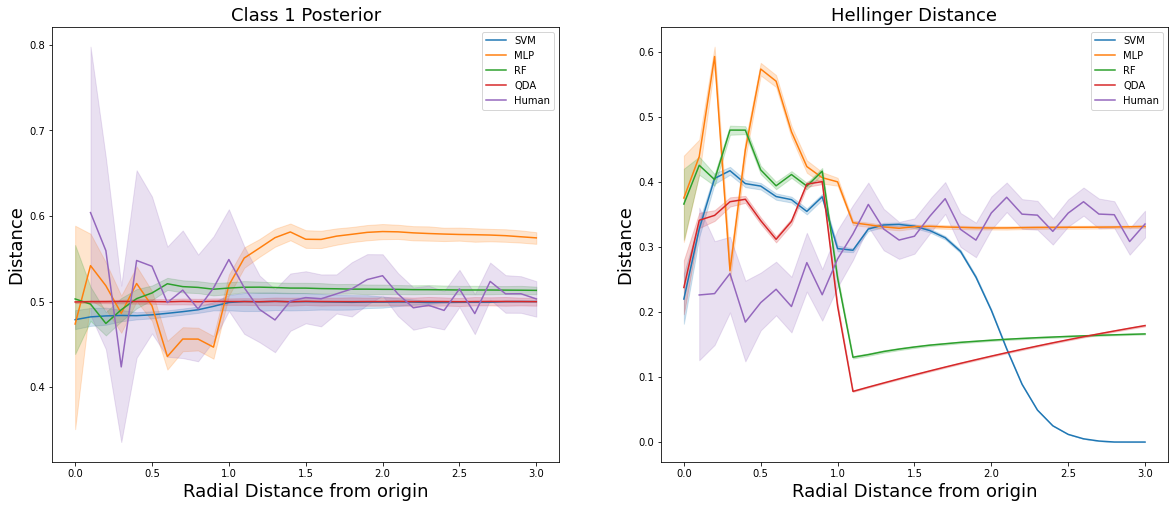

In [14]:
fig, axs = plt.subplots(1,2, figsize=(10*2,8))

for j in range(2):
    for i in range(5):
        
        if i == 4:
            
            hmask = np.column_stack([ib.human[1][:,3], ib.human[1][:,5]])
            if j == 0:
                temp = ib.get_radialDist(np.column_stack([hmask, ib.human[1][:,0]]).astype(float))
            else:
                temp = ib.get_radialDist(np.column_stack([hmask, ib.human[1][:,6]]).astype(float))
        else:
            if j == 0:
                temp = ib.get_radialDist(np.column_stack([ib.mask, ib.estpst[1][2][i]]))
            else:
                temp = ib.get_radialDist(np.column_stack([ib.mask, ib.hdist[1][2][i]]))

        temp2 = pd.DataFrame(temp[1]).T
        temp2.columns = temp[0]
        temp2 = temp2.melt().dropna()
        temp2.columns=['Radial Distance from origin', 'Distance']
        axs[j].set_title(titles[j], fontsize=fsize)
        axs[j].set_xlabel(temp2.columns[0], fontsize=fsize)
        axs[j].set_ylabel(temp2.columns[1], fontsize=fsize)
        sns.lineplot(data=temp2, x=temp2.columns[0], y=temp2.columns[1], ci=95, label=label[i], ax=axs[j])

## Spiral radial plots

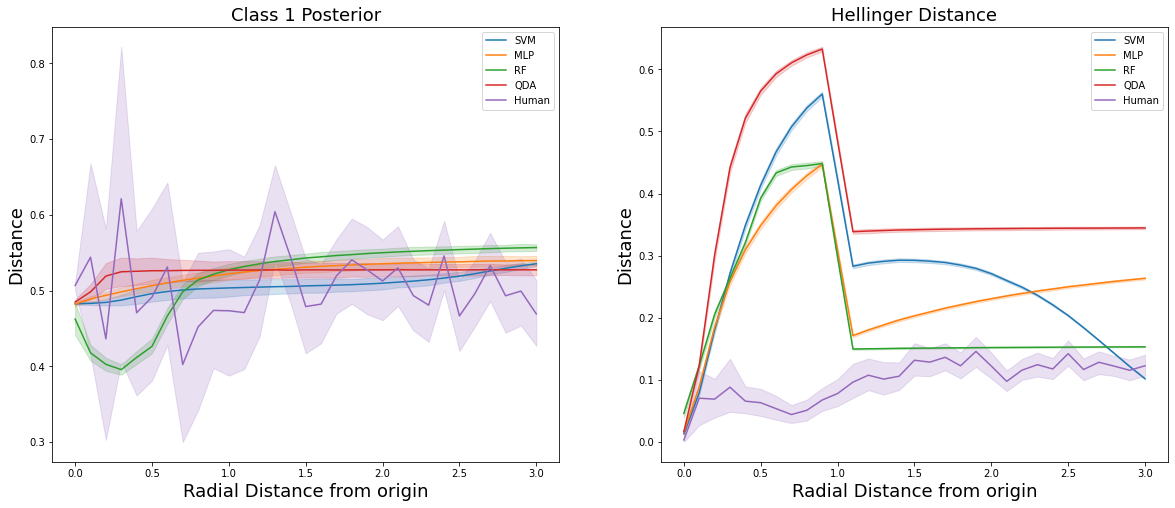

In [13]:
fig, axs = plt.subplots(1,2, figsize=(10*2,8))

for j in range(2):
    for i in range(5):
        
        if i == 4:
            
            hmask = np.column_stack([ib.human[0][:,3], ib.human[0][:,5]])
            if j == 0:
                temp = ib.get_radialDist(np.column_stack([hmask, ib.human[0][:,0]]).astype(float))
            else:
                temp = ib.get_radialDist(np.column_stack([hmask, ib.human[0][:,6]]).astype(float))
        else:
            if j == 0:
                temp = ib.get_radialDist(np.column_stack([ib.mask, ib.estpst[1][4][i]]))
            else:
                temp = ib.get_radialDist(np.column_stack([ib.mask, ib.hdist[1][4][i]]))

        temp2 = pd.DataFrame(temp[1]).T
        temp2.columns = temp[0]
        temp2 = temp2.melt().dropna()
        temp2.columns=['Radial Distance from origin', 'Distance']
        axs[j].set_title(titles[j], fontsize=fsize)
        axs[j].set_xlabel(temp2.columns[0], fontsize=fsize)
        axs[j].set_ylabel(temp2.columns[1], fontsize=fsize)
        sns.lineplot(data=temp2, x=temp2.columns[0], y=temp2.columns[1], ci=95, label=label[i], ax=axs[j])